## Exploratory Data Analysis / Data Understanding

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [75]:
dati = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col=None)

In [76]:
dati.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [78]:
dati.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
dati.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [80]:
dati.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [81]:
dati.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [82]:
dati.columns.to_series().groupby(dati.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

## Correlation analysis (between numerical features)

In [83]:
dati.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


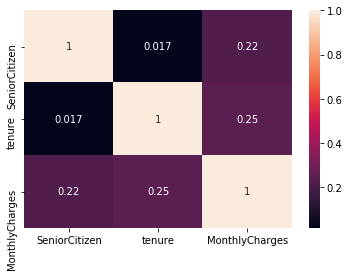

In [84]:
corrMatrix = dati.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### I valori sono bassi e non molto rilevanti.

## Correlation analysis with target variable (between numerical features)

### Trasformo Churn in numerico per poter correlare le variabili input a quella target

In [85]:
dati = pd.get_dummies(dati, columns = ['Churn'], drop_first = True)

In [86]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
correlations = dati.corrwith(dati.Churn_Yes)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 MonthlyCharges    0.193356
SeniorCitizen     0.150889
dtype: float64

Most Negative Correlations: 
 tenure   -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

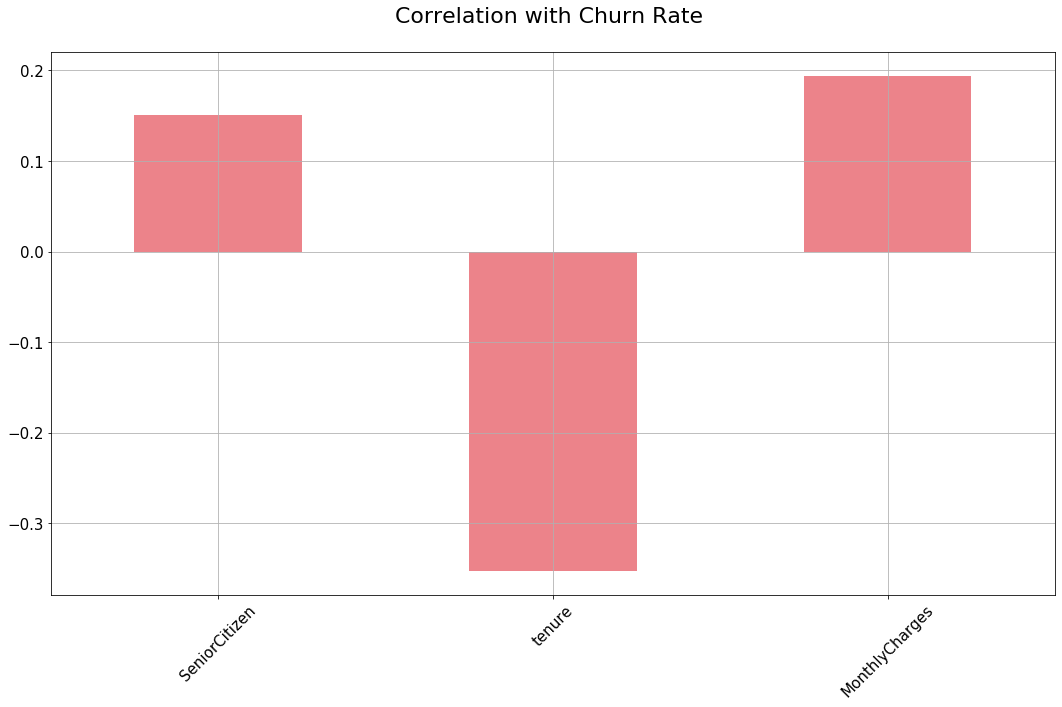

In [88]:
correlations = dati.corrwith(dati.Churn_Yes)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

### 'tenure' è Correlata negativamente con la variabile target. 

## Preprocessing

### Converto Total Charges in numerico in quanto ha valori numerici ma è erroneamente classificato come valore 'object'

In [89]:
dati['TotalCharges']  = pd.to_numeric(dati['TotalCharges'], errors='coerce')

dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Rimuovo eventuali valori duplicati

In [90]:
dati.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


### Controllo eventuali Missing Values

In [91]:
dati.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn_Yes            0
dtype: int64

In [92]:
dati.isna().sum().sum()

11

### Rimuovo le righe con questi 11 valori. Ciò non compromette il modello. Ha molti esempi.

In [93]:
dati = dati.dropna()

In [94]:
dati.isna().sum().sum()

0

### Rimuovo Customer ID

In [95]:
dati = dati.drop(['customerID'], axis=1)

### Features Engineering

(array([0, 1]), <a list of 2 Text xticklabel objects>)

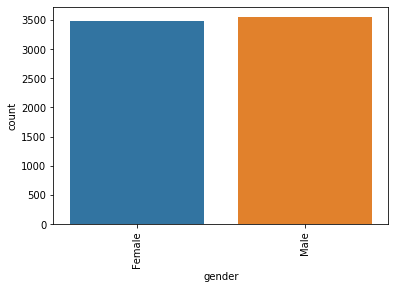

In [96]:
sn.countplot(x='gender', data=dati)
plt.xticks(rotation=90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

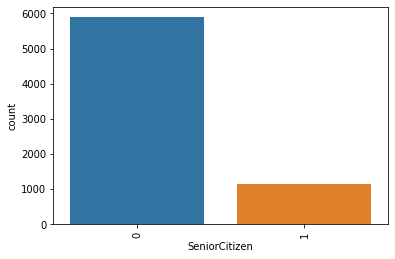

In [97]:
sn.countplot(x='SeniorCitizen', data=dati)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

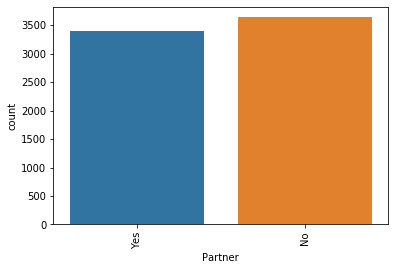

In [98]:
sn.countplot(x='Partner', data=dati)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

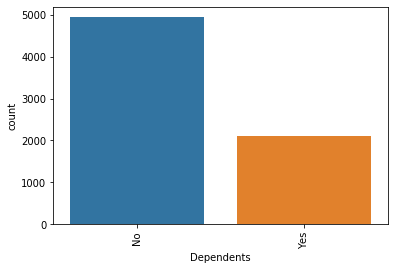

In [99]:
sn.countplot(x='Dependents', data=dati)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

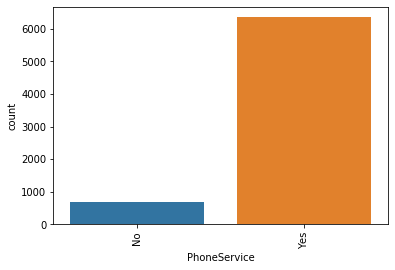

In [100]:
sn.countplot(x='PhoneService', data=dati)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

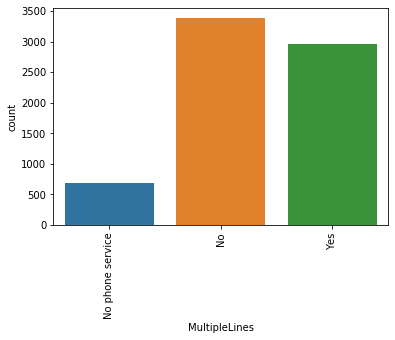

In [101]:
sn.countplot(x='MultipleLines', data=dati)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

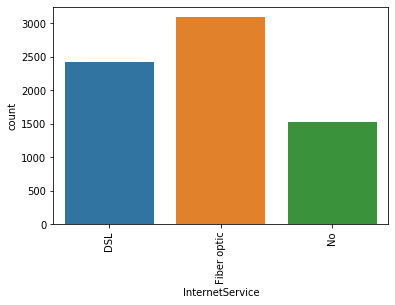

In [102]:
sn.countplot(x='InternetService', data=dati)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

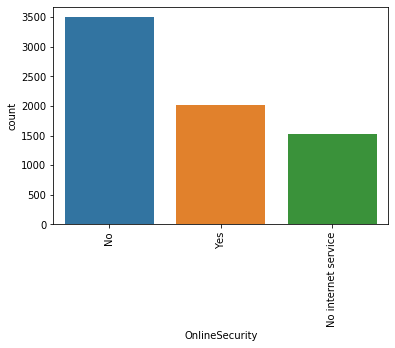

In [103]:
sn.countplot(x='OnlineSecurity', data=dati)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

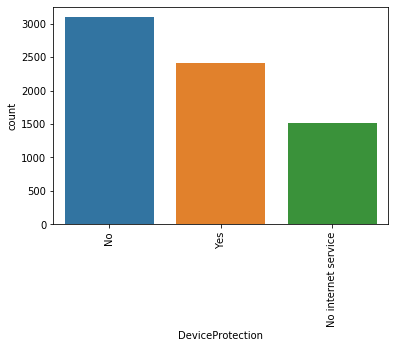

In [104]:
sn.countplot(x='DeviceProtection', data=dati)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

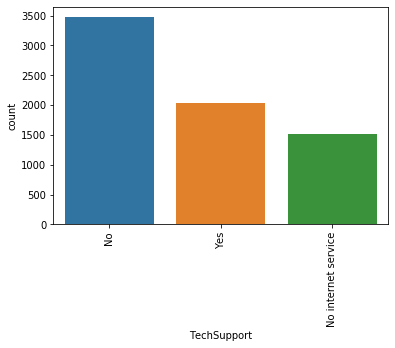

In [105]:
sn.countplot(x='TechSupport', data=dati)
plt.xticks(rotation=90)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

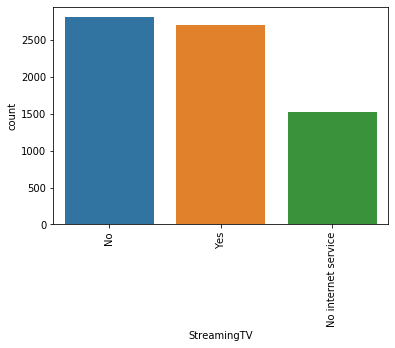

In [106]:
sn.countplot(x='StreamingTV', data=dati)
plt.xticks(rotation=90)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

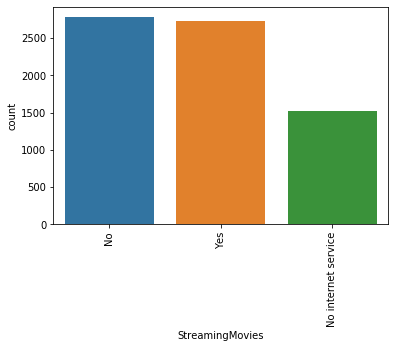

In [107]:
sn.countplot(x='StreamingMovies', data=dati)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

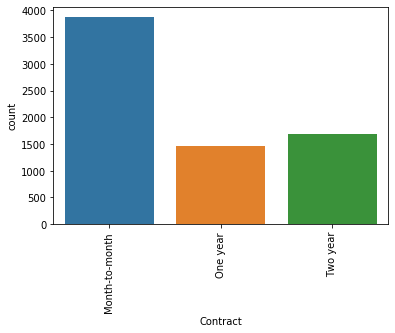

In [108]:
sn.countplot(x='Contract', data=dati)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

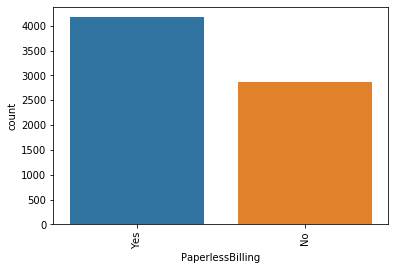

In [109]:
sn.countplot(x='PaperlessBilling', data=dati)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

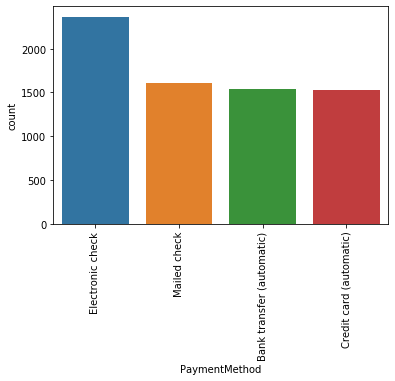

In [110]:
sn.countplot(x='PaymentMethod', data=dati)
plt.xticks(rotation=90)

## Trasformiamo le variabili categoriche in numeriche col metodo get_dummies

In [111]:
# Dummy Variables for 16 columns. When drop_first is set as True, 
# it gives k-1 dummies out of k categorical levels by removing the first level.'''
dati = pd.get_dummies(dati, columns = ['gender','OnlineBackup','SeniorCitizen', 'Partner', 'Dependents','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod'], drop_first = True)

In [112]:
dati

,tenure,MonthlyCharges,TotalCharges,Churn_Yes,gender_Male,OnlineBackup_No internet service,OnlineBackup_Yes,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,0,0,0,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.90,0,0,0,1,0,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.45,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.60,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


dati.info()

In [113]:
dati.isna().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn_Yes                                0
gender_Male                              0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

### Controllo la distribuzione della variabile target

In [114]:
dati['Churn_Yes'].value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

### Impostazione della matrice delle features e della variabile target

In [115]:
#la target class è 'target'
attributes = [col for col in dati.columns if col != 'Churn_Yes']
X = dati[attributes].values # qui ho tutti i valori del datset salvati come lista di vettori, 1 per ogni osservazione
y = dati['Churn_Yes'] #  qui ho solo i valori della target class 'left'

### Normalizzo le features con min max scaler

In [116]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
X_Scaled = trans.fit_transform(X)
X = DataFrame(X_Scaled)
# summarize
print(X.describe())
print

                0            1            2            3            4   \
count  7032.000000  7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.442560     0.463166     0.261309     0.504693     0.216155   
std       0.345708     0.299363     0.261571     0.500014     0.411650   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.112676     0.172512     0.044155     0.000000     0.000000   
50%       0.394366     0.518408     0.159090     1.000000     0.000000   
75%       0.760563     0.712562     0.435719     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  7032.000000  7032.000000  7032.000000  7032.000000  7032.000000  ...   
mean      0.344852     0.162400     0.482509     0.298493     0.903299  ...   
std       0.475354     0.368844     0.499729     0.457629     0.295571  ...   
min       0.00000

<function print>

### Partiziono il dataset

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)# IMPORTANTE stratificato rispetto a y

### Stessa distribuzione sbilanciata tra le classi sia nel dataset originale che nel training set che nel test set

In [118]:
np.unique(y, return_counts=True)[1]/len(y)

array([0.73421502, 0.26578498])

In [119]:
#controllo campionamento stratificato sul training set
np.unique(y_train, return_counts=True)[1]/len(y_train)

array([0.73425437, 0.26574563])

In [120]:
#controllo campionamento stratificato sul test set
np.unique(y_test, return_counts=True)[1]/len(y_test)

array([0.73412322, 0.26587678])

In [121]:
X_train.shape, X_test.shape

((4922, 30), (2110, 30))

### Scelta del migliore modello (Best model)

In [122]:
#Import Libraries and Read the data
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split

In [123]:
classifiers = []
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [124]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 0.7767772511848341
Confusion Matrix of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missin

### Features importance

Feature: 0, Score: 0.01271
Feature: 1, Score: 0.01484
Feature: 2, Score: 0.17860
Feature: 3, Score: 0.30196
Feature: 4, Score: 0.09041
Feature: 5, Score: 0.00952
Feature: 6, Score: 0.16397
Feature: 7, Score: 0.04411
Feature: 8, Score: 0.13062
Feature: 9, Score: 0.05326


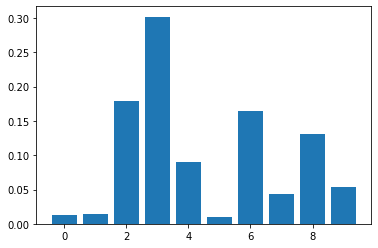

In [125]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Decision Tree

In [164]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV # ricerca esaustiva fra i parametri
from sklearn.model_selection import RandomizedSearchCV # ricerca randomica fra i parametri con numero prefissato di candidati

In [166]:
clf = DecisionTreeClassifier()

param_list = {
    'max_depth': [None, 2, 4, 6, 8, 16, 32],
    'min_samples_leaf': [1, 5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'class_weight' : [{0: 0.3, 1: 0.7}],#per dare un peso diverso alle classi e spingere classificatore a costruirsi tenendo conto di questo settaggio
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(clf, param_grid=param_list, cv=5, scoring='accuracy') # ricerca esaustiva fra i parametri
grid_search.fit(X_train, y_train)# (NB: gli passo X_train,y_train ossia solo training perchè poi utilizzo il modello ritornato)
clf_best_grid = grid_search.best_estimator_ # il miglior calssificatore trovato rispetto all'accuratezza

In [167]:
grid_search.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 100,
 'min_samples_split': 2}

In [168]:
clf_best_grid

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.3, 1: 0.7},
                       criterion='entropy', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

### Alleno il modello con i migliori parametri individuati tramite Grid Search

In [169]:
clf = DecisionTreeClassifier(class_weight= {0: 0.3, 1: 0.7}, criterion= 'entropy', max_depth= 6, 
                             min_samples_leaf= 100, min_samples_split= 2) 

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.3, 1: 0.7},
                       criterion='entropy', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

### Fitting del modello sul training

In [170]:
y_pred = clf.predict(X_train) # applico il modello di predizione sul training set
print (y_pred)
print (y_train)

[1 0 1 ... 0 0 1]
4499    1
1933    0
4668    0
5681    0
3610    1
       ..
5161    0
3451    0
4135    0
4249    0
272     1
Name: Churn_Yes, Length: 4922, dtype: uint8


In [171]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [172]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.7862657456318569


In [173]:
print('F1-score %s' % f1_score(y_train, y_pred))#, average=None))# average = none -> resituisce F1-score per ogni classe

F1-score 0.6409556313993174


In [174]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3614
           1       0.58      0.72      0.64      1308

    accuracy                           0.79      4922
   macro avg       0.73      0.76      0.74      4922
weighted avg       0.81      0.79      0.79      4922



In [175]:
confusion_matrix(y_train, y_pred)

array([[2931,  683],
       [ 369,  939]], dtype=int64)

In [176]:
"""plot_roc(y_train, clf.predict_proba(X_train))
plt.show()"""

'plot_roc(y_train, clf.predict_proba(X_train))\nplt.show()'

### Validazione del modello sul test

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

In [178]:
y_pred = clf.predict(X_test)

In [179]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))

Accuracy 0.7611374407582938


In [180]:
print('F1-score %s' % f1_score(y_test, y_pred))# average = none -> resituisce F1-score per ogni classe average=None))

F1-score 0.6018957345971565


In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1549
           1       0.54      0.68      0.60       561

    accuracy                           0.76      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.76      0.77      2110



In [182]:
confusion_matrix(y_test, y_pred)

array([[1225,  324],
       [ 180,  381]], dtype=int64)

In [183]:
"""plot_roc(y_test, clf.predict_proba(X_test))
plt.show()"""

'plot_roc(y_test, clf.predict_proba(X_test))\nplt.show()'

## Random Forest Classifier

In [184]:
clf = RandomForestClassifier()

param_list = {
    'max_depth': [None, 2, 4, 6, 8, 16, 32],
    'min_samples_leaf': [1, 5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'class_weight' : [{0: 0.3, 1: 0.7}],#per dare un peso diverso alle classi e spingere classificatore a costruirsi tenendo conto di questo settaggio
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10,20,50,100,200]
}


grid_search = GridSearchCV(clf, param_grid=param_list, cv=5, scoring='accuracy') # ricerca esaustiva fra i parametri
grid_search.fit(X_train, y_train)# (NB: gli passo X_train,y_train ossia solo training perchè poi utilizzo il modello ritornato)
clf_best_grid = grid_search.best_estimator_ # il miglior calssificatore trovato rispetto all'accuratezza

In [185]:
grid_search.best_params_

{'class_weight': {0: 0.3, 1: 0.7},
 'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [186]:
clf_best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.3, 1: 0.7}, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### Alleno il modello con i migliori parametri individuati tramite Grid Search

In [187]:
clf = RandomForestClassifier(n_estimators=100, class_weight= {0: 0.3, 1: 0.7}, criterion= 'gini', max_depth= 16, 
                             min_samples_leaf= 1, min_samples_split= 2) 

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.3, 1: 0.7}, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### Fitting del modello sul training

In [188]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

In [189]:
y_pred = clf.predict(X_train)

In [190]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))

Accuracy 0.9863876472978464


In [191]:
print('F1-score %s' % f1_score(y_train, y_pred)) ## average=None))

F1-score 0.9749532710280374


In [192]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3614
           1       0.95      1.00      0.97      1308

    accuracy                           0.99      4922
   macro avg       0.98      0.99      0.98      4922
weighted avg       0.99      0.99      0.99      4922



In [193]:
confusion_matrix(y_train, y_pred)

array([[3551,   63],
       [   4, 1304]], dtype=int64)

In [ ]:
"""plot_roc(y_train, clf.predict_proba(X_train))
plt.show()"""

### Validazione del modello sul test

In [194]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

In [195]:
y_pred = clf.predict(X_test)

In [196]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))

Accuracy 0.7843601895734598


In [197]:
print('F1-score %s' % f1_score(y_test, y_pred)) ## average=None))

F1-score 0.5526057030481809


In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.71      2110
weighted avg       0.77      0.78      0.78      2110



In [199]:
confusion_matrix(y_test, y_pred)

array([[1374,  175],
       [ 280,  281]], dtype=int64)

In [ ]:
"""plot_roc(y_test, clf.predict_proba(X_test))
plt.show()"""